In [1]:
# %matplotlib

import test
# import datetime as d
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.signal as sg
import pandas as pd
from scipy import stats as st
from sklearn.metrics import accuracy_score as acc
from sklearn import model_selection as ms
import numpy as np

# pd.plotting.register_matplotlib_converters()

## Get Data


Starting dump run for date range 2020-01-01 00:00:00 - 2020-08-13 00:00:00 @interval=1hour


Data acquired. Total data points:5399

Creating Parameter system of order:3...

Parameters are ready...

- Creating addtional features...

Data modelling complete...



C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


- Performing Fourier Transform for v..

- Performing Fourier Transform for c..



c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1['dv1t_o'],xdate=False,linestyle='-',label='dv1t_o',marker='')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1.x1_pr,xdate=False,linestyle='dotted',marker='',linewidth=0.8,label='x1_pr')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1.x1_gn,xdate=False,linestyle='dotted',marker='',linewidth=0.8,label='x1_gn')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py

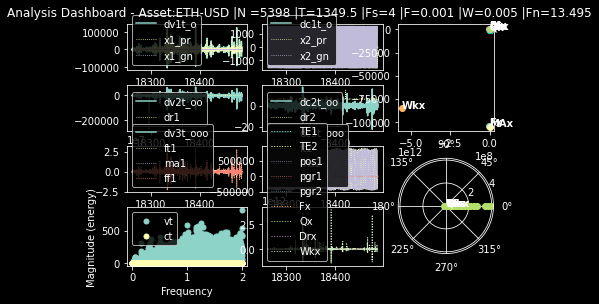

- Dump Complete...


In [2]:
Fs = 4
data_o = test.testbed(start=dt(2020,1,1),stop=dt(2020,8,13),Fs=Fs,interval='1hour')

### Variables

In [3]:
columns = ['dv1t_o','dv2t_oo','dv3t_ooo','vf_t','v_fft','dr1','ma1','ft1','wrk1','TE1','KE1','PE1','w1','w1_n','rf1','q1','x1_gn','x1_pr','wrk1','idpos1','idpos2'
            ,'Ftm','Fta','Ftt','Ffm','Ffa','Fft','Mam','Maa','Mat','Qfm','Qfa','Qft','Pxm','Pxa','Pxt','Wkm','Wka','Wkt','Drm','Dra','Drt','wrk2'
            ,'x2_pr','x2_gn','q2','rf2','w2_n','w2','PE2','KE2','TE2','wrk2','ft2','ma2','dr2','c_fft','cf_t','dc3t_ooo','dc2t_oo','dc1t_o']

In [4]:
data_o.columns.values

array(['l', 'h', 'o', 'c', 'v', 'idposc', 'c1t_1', 'dc1t_o', 'c2t_1',
       'dc2t_o', 'c2to_1', 'dc2t_oo', 'c3t_1', 'dc3t_o', 'c3to_1',
       'dc3t_oo', 'c3too_1', 'dc3t_ooo', 'v1t_1', 'dv1t_o', 'v2t_1',
       'dv2t_o', 'v2to_1', 'dv2t_oo', 'v3t_1', 'dv3t_o', 'v3to_1',
       'dv3t_oo', 'v3too_1', 'dv3t_ooo', 'idpos1', 'idpos2', 'al1', 'al2',
       'x1_gn', 'x2_gn', 'x1_pr', 'x2_pr', 'al1n', 'al2n', 'ft1', 'ft2',
       'ff1', 'ff2', 'k1', 'k2', 'ac1', 'ac2', 'ma1', 'ma2', 'w1_n',
       'w2_n', 'pgr1', 'pgr2', 'dr1', 'dr2', 'w1', 'w2', 'rf1', 'rf2',
       'fr1', 'fr2', 'lmda1', 'lmda2', 'q1', 'q2', 'PE1', 'KE1', 'TE1',
       'PE2', 'KE2', 'TE2', 'wrk1', 'wrk2', 'pwr1', 'pwr2', 'Pxm', 'Pxa',
       'Pxt', 'Ftm', 'Fta', 'Ftt', 'Mam', 'Maa', 'Mat', 'Ffm', 'Ffa',
       'Fft', 'Qfm', 'Qfa', 'Qft', 'Drm', 'Dra', 'Drt', 'Wkm', 'Wka',
       'Wkt', 'Pwm', 'Pwa', 'Pwt', 'Trq', 'v_fft', 'fft_freq', 'vf_t',
       'c_fft', 'cf_t'], dtype=object)

In [5]:
data_o[['w1_n','w1','lmda1','dr1','al1','k1','k2','al2','dr2','lmda2','w2','w2_n']].describe()

,w1_n,w1,lmda1,dr1,al1,k1,k2,al2,dr2,lmda2,w2,w2_n
count,5.398000e+03,5398.000000,5.398000e+03,5398.000000,5398.000000,5.398000e+03,5.398000e+03,5398.000000,5398.000000,5398.000000,5398.0,5398.00000
mean,8.129264e+00,8.944210,-4.032989e+02,-49.610750,-12.205472,6.608493e+01,1.516580e+02,1.000011,6.157544,75.829850,0.0,12.31495
std,1.776521e-15,62.238922,3.030972e+04,3728.470088,917.295874,1.421217e-14,2.842434e-14,0.026971,0.166073,2.045181,0.0,0.00000
min,8.129264e+00,0.000000,-2.224453e+06,-273635.293139,-67321.051123,6.608493e+01,1.516580e+02,0.000000,0.000000,0.000000,0.0,12.31495
25%,8.129264e+00,0.000000,3.591620e+00,0.441814,0.108697,6.608493e+01,1.516580e+02,0.999557,6.154745,75.795380,0.0,12.31495
50%,8.129264e+00,0.000000,3.556184e+01,4.374547,1.076247,6.608493e+01,1.516580e+02,0.999989,6.157404,75.828127,0.0,12.31495
75%,8.129264e+00,6.041746,6.124969e+01,7.534470,1.853666,6.608493e+01,1.516580e+02,1.000380,6.159817,75.857845,0.0,12.31495
max,8.129264e+00,4252.438761,6.218868e+04,7649.977121,1882.083612,6.608493e+01,1.516580e+02,2.359503,14.528583,178.918779,0.0,12.31495


In [6]:
sig = data_o[columns]

In [7]:
# Normalize training data
sign = sig.copy()

sign.reset_index(drop=True,inplace=True)

for col in sign:
        if col not in ['idpos1','idpos2']:
            sign[col] = (sign[col]-sign[col].mean())/sign[col].std()
            sign[col] = sign[col].replace([np.inf, -np.inf], np.nan)
            sign[col] = sign[col].fillna(np.abs(sign[col]).max())

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [8]:
sign.drop(['idpos1','idpos2'],axis=1).describe()

,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03+0.000000e+00j,0.0+0.0j,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03,...,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03,0.0+0.0j,5.398000e+03+0.000000e+00j,5.398000e+03,5.398000e+03,5.398000e+03
mean,-1.511697e-18,-3.599278e-18,-4.082610e-18,2.858855e-18-1.402939e-32j,N000a000N,-2.632615e-18,5.429768e-18,-1.316307e-18,-2.106092e-17,5.265230e-18,...,-2.632615e-18,-6.581537e-18,-1.250492e-17,1.447938e-17,-2.806367e-15,N000a000N,1.184677e-17+5.845579e-33j,-1.624817e-18,-1.828433e-17,5.265230e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00+0.000000e+00j,N000a000N,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,N000a000N,1.000000e+00+0.000000e+00j,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.127918e+01,-1.544428e+01,-1.367077e+01,-1.127918e+01-1.160328e-15j,N000a000N,-7.337746e+01,-1.939882e+00,-1.061051e+01,-1.423695e+00,-2.596653e+01,...,-2.788221e+01,-1.597966e+01,-1.391454e+00,-1.387643e+00,-3.707732e+01,N000a000N,-1.654343e+01+8.501464e-16j,-1.069959e+01,-1.468687e+01,-1.654343e+01
25%,-2.043373e-01,-1.742727e-01,-2.087773e-01,-2.043373e-01+2.863179e-16j,N000a000N,1.342442e-02,-8.824515e-01,-2.191969e-01,-1.326703e-01,1.146214e-01,...,1.067734e-01,-2.559261e-01,-9.103354e-01,-9.101574e-01,-1.685440e-02,N000a000N,-3.626522e-01+5.102421e-16j,-4.298843e-01,-4.152350e-01,-3.626522e-01
50%,-1.518573e-02,3.773168e-02,1.564277e-03,-1.518573e-02+3.568306e-16j,N000a000N,1.447921e-02,1.563638e-01,1.111754e-02,-1.285671e-01,1.413460e-01,...,1.301146e-01,-1.617129e-02,-3.046897e-01,-3.055944e-01,-8.426247e-04,N000a000N,-3.666367e-03-1.391582e-16j,1.948614e-03,-3.331246e-03,-3.666367e-03
75%,1.753129e-01,2.440163e-01,2.266970e-01,1.753129e-01+4.470564e-16j,N000a000N,1.532672e-02,8.394626e-01,2.269547e-01,-1.057446e-01,1.460123e-01,...,1.342018e-01,2.176061e-01,1.010401e+00,1.010205e+00,1.368822e-02,N000a000N,3.709276e-01-1.524488e-16j,4.262386e-01,4.052772e-01,3.709276e-01
max,1.439184e+01,8.881406e+00,1.337986e+01,1.439184e+01+3.924660e-16j,N000a000N,2.065080e+00,1.672332e+00,1.354960e+01,2.799399e+01,1.731081e-01,...,1.633743e-01,1.188599e+01,1.824949e+00,1.824939e+00,5.040577e+01,N000a000N,8.688834e+00-1.282586e-15j,1.433164e+01,1.152997e+01,8.688834e+00


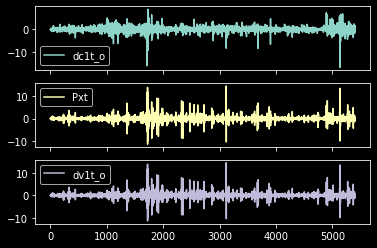

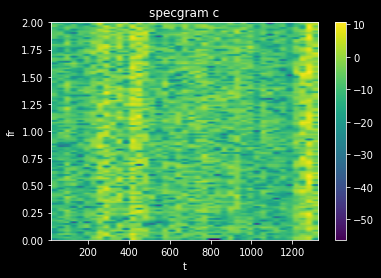

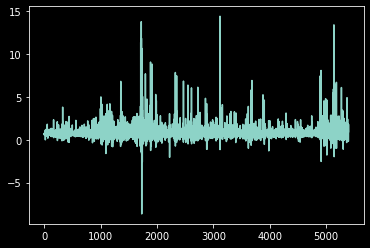

In [9]:
sign[['dc1t_o','Pxt','dv1t_o']].plot(subplots=True)
plt.show()

Spc, fr, t,im  = plt.specgram(sign.dc1t_o,Fs=Fs)
plt.title('specgram c')
plt.xlabel('t')
plt.ylabel('fr')
plt.colorbar()
plt.show()

np.logaddexp(sign.dv1t_o,sign.dc1t_o).plot()
plt.show()

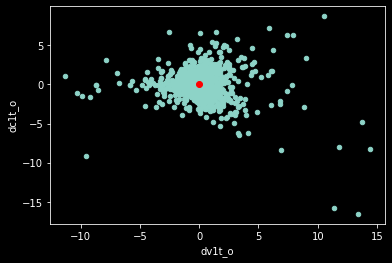

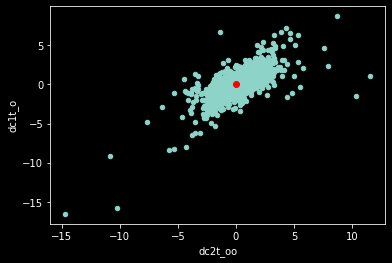

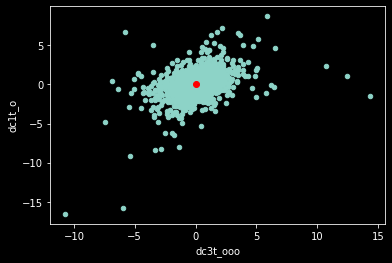

Text(0.5, 0, 'dc1t_o-1')

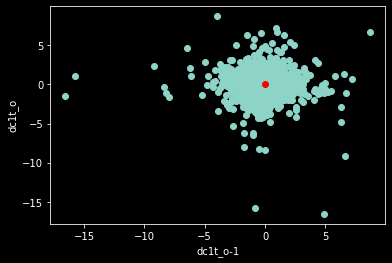

In [10]:
sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc2t_oo','dc1t_o')
plt.plot(sign.dv2t_oo.mean(),sign.dc2t_oo.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc3t_ooo','dc1t_o')
plt.plot(sign.dv3t_ooo.mean(),sign.dc3t_ooo.mean(),color='r',marker='o')
plt.show()
plt.scatter(sign['dc1t_o'].shift(1),sign['dc1t_o'])
plt.plot(sign.dc1t_o.mean(),sign.dc1t_o.shift(1).mean(),color='r',marker='o')
plt.ylabel('dc1t_o')
plt.xlabel('dc1t_o-1')

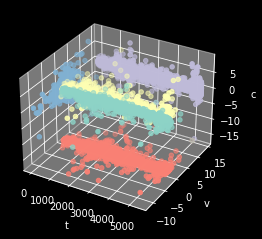

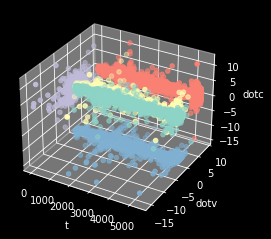

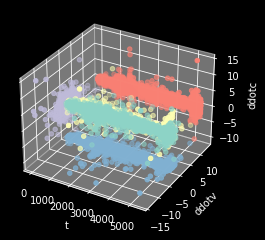

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv1t_o[sign.idpos1==0],sign.dc1t_o[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv1t_o[sign.idpos1==1],sign.dc1t_o[sign.idpos1==1])
ax.scatter(sign.index,sign.dv1t_o.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dv1t_o,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.dv1t_o,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('v')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv2t_oo[sign.idpos1==0],sign.dc2t_oo[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv2t_oo[sign.idpos1==1],sign.dc2t_oo[sign.idpos1==1])
ax.scatter(np.zeros(len(sign)),sign.dv2t_oo,sign.dc2t_oo)
ax.scatter(sign.index,sign.dv2t_oo.max(),sign.dc2t_oo)
ax.scatter(sign.index,sign.dv2t_oo,sign.dc2t_oo.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('dotv')
ax.zaxis.label.set_text('dotc')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv3t_ooo[sign.idpos1==0],sign.dc3t_ooo[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv3t_ooo[sign.idpos1==1],sign.dc3t_ooo[sign.idpos1==1])
ax.scatter(np.zeros(len(sign)),sign.dv3t_ooo,sign.dc3t_ooo)
ax.scatter(sign.index,sign.dv3t_ooo.max(),sign.dc3t_ooo)
ax.scatter(sign.index,sign.dv3t_ooo,sign.dc3t_ooo.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ddotv')
ax.zaxis.label.set_text('ddotc')

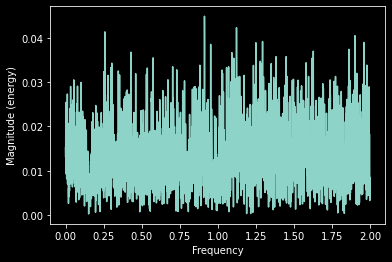

min energy: 0.00026589053662429905 @ 0.1519081141163394 Hz / 0.9544668306571436 Rad/s
max energy: 0.04487296889786082 @ 0.9129307150796592 Hz / 5.736112855461467 Rad/s
mean energy: 0.01390954835307677 @ 0.1015190811411634 Hz / 0.63786319902453 Rad/s


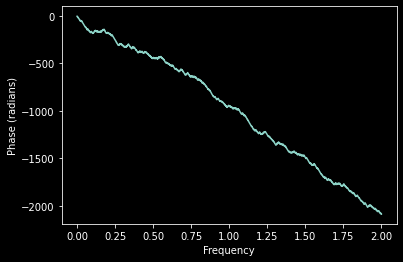

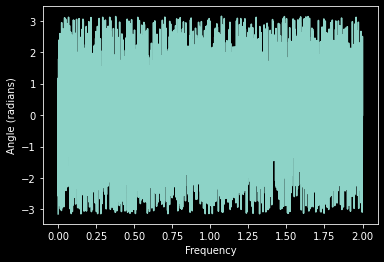

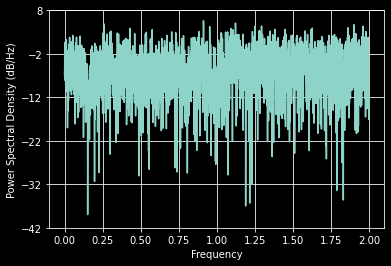

max psd dB/Hz: 3.622436424537383 @ 0.9129307150796592 Hz / 5.736112855461467 Rad/s
min psd dB/Hz: 0.0001271853016619775 @ 0.1519081141163394 Hz / 0.9544668306571436 Rad/s
mean psd dB/Hz: 0.4476859369787861 @ [] Hz / [] Rad/s


In [12]:
s,fm,l = plt.magnitude_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

de = st.describe(s)
print('min energy:',de.minmax[0],'@',fm[s==s.min()][0],'Hz','/',2*np.pi*fm[s==s.min()][0],'Rad/s')
print('max energy:',de.minmax[1],'@',fm[s==s.max()][0],'Hz','/',2*np.pi*fm[s==s.max()][0],'Rad/s')
print('mean energy:',de.mean,'@',fm[s.round(4)==s.mean().round(4)][0],'Hz','/',2*np.pi*fm[s.round(4)==s.mean().round(4)][0],'Rad/s')

p,fp,l = plt.phase_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

a,fa,l = plt.angle_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

pwr,fr = plt.psd(sign.dc1t_o,noverlap=len(sign)//2,NFFT=len(sign),Fs=Fs)
plt.show()
print('max psd dB/Hz:',pwr.max(),'@',fr[pwr==pwr.max()][0],'Hz','/',2*np.pi*fr[pwr==pwr.max()][0],'Rad/s')
print('min psd dB/Hz:',pwr.min(),'@',fr[pwr==pwr.min()][0],'Hz','/',2*np.pi*fr[pwr==pwr.min()][0],'Rad/s')
print('mean psd dB/Hz:',pwr.mean(),'@',fr[pwr.round(4)==pwr.mean().round(4)],'Hz','/',2*np.pi*fr[pwr.round(4)==pwr.mean().round(4)],'Rad/s')

### Magnitude Squared Coherence

In [13]:
de

DescribeResult(nobs=2700, minmax=(0.00026589053662429905, 0.04487296889786082), mean=0.01390954835307677, variance=5.545363704808647e-05, skewness=0.6327481968806598, kurtosis=0.15057414608223763)

Max Coherence: 0.2575537682391318 @ 1.625 Hz
Min Coherence: 7.137324351177006e-05 @ 0.640625 Hz
Mean Coherence 0.05111480037895124 @ 0.5625 Hz
Variance: 0.0026030583864030355
Kurtosis: 3.0769275891536276


count    129.000000
mean       0.051115
std        0.051219
min        0.000071
25%        0.016633
50%        0.030375
75%        0.070698
max        0.257554
dtype: float64

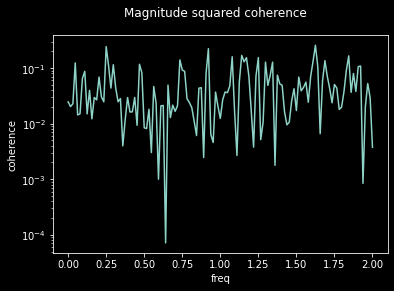

In [14]:
# Magnitude squared coherence Cxy = abs(Pxy)**2/(Pxx*Pyy)
# where Pxx and Pyy are power spectral densities and Pxy is the
# cross spectral density.
fc,Cxy = sg.coherence(sign.dc1t_o,sign.dv1t_o,fs=Fs)

plt.semilogy(fc,Cxy)
plt.suptitle('Magnitude squared coherence')
plt.xlabel('freq')
plt.ylabel('coherence')

print('Max Coherence:',Cxy.max(),'@',fc[Cxy==Cxy.max()][0],'Hz')
print('Min Coherence:',Cxy.min(),'@',fc[Cxy==Cxy.min()][0],'Hz')
print('Mean Coherence',Cxy.mean(),'@',fc[Cxy.round(2)==np.round(Cxy.mean(),2)][0],'Hz')
print('Variance:',np.var(Cxy))
print('Kurtosis:',st.kurtosis(Cxy))
pd.Series(Cxy).describe()

### Covariance Leaderboard

In [15]:
cov=sign.cov()
cov_ld = cov.abs() > cov.quantile(0.44)
cov_ldbrd = cov[cov_ld].dropna()
cov_ldbrd

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\internals\managers.py:1517: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o


### Correlation Leaderboard idpos1

In [16]:
corr = sign.corrwith(sign.idpos1).sort_values(ascending=False)
corr_ldbrd = corr[corr.abs()>=corr.quantile(0.60)]
corr_ldbrd

idpos1      1.000000+0.000000j
Pxa         0.719312+0.000000j
dc1t_o      0.601719+0.000000j
cf_t        0.601719-0.000000j
dc2t_oo     0.468957+0.000000j
idpos2      0.293041+0.000000j
dc3t_ooo    0.292306+0.000000j
Ffa         0.196283+0.000000j
wrk2        0.191857+0.000000j
wrk2        0.191857+0.000000j
Wka         0.054768+0.000000j
TE2         0.024801+0.000000j
dr2         0.018234+0.000000j
TE1         0.015960+0.000000j
Drm         0.012182+0.000000j
x1_gn       0.009291+0.000000j
Qfm         0.007385+0.000000j
rf1         0.005244+0.000000j
w1          0.005244+0.000000j
ma1         0.003853+0.000000j
q2          0.002410+0.000000j
x2_gn       0.002183+0.000000j
Mat         0.001061+0.000000j
x2_pr      -0.001068+0.000000j
dv2t_oo    -0.002806+0.000000j
Ffm        -0.004507+0.000000j
Fta        -0.005199+0.000000j
Maa        -0.007015+0.000000j
Ftm        -0.007973+0.000000j
Qft        -0.010165+0.000000j
q1         -0.010167+0.000000j
Mam        -0.011790+0.000000j
Pxt     

### Correlation Leaderboard Idpos2

In [17]:
corr = sign.corrwith(sign.idpos2).sort_values(ascending=False)
corr_ldbrd = corr[corr.abs()>=corr.quantile(0.80)]
corr_ldbrd

idpos2      1.000000+0.000000j
idpos1      0.293041+0.000000j
cf_t        0.280717+0.000000j
dc1t_o      0.280717+0.000000j
dc2t_oo     0.223202+0.000000j
Pxa         0.162290+0.000000j
Ffa         0.145131+0.000000j
dc3t_ooo    0.143071+0.000000j
wrk2        0.085633+0.000000j
wrk2        0.085633+0.000000j
Qfm         0.050773+0.000000j
TE2         0.039793+0.000000j
PE2        -0.039801+0.000000j
Qft        -0.042215+0.000000j
q1         -0.042218+0.000000j
Dra        -0.067987+0.000000j
Ftm        -0.092016+0.000000j
Ffm        -0.100475+0.000000j
Pxm        -0.112251+0.000000j
dtype: complex128

### Resonance Factor Stats for idpos1 = 1

In [18]:
sign[['rf1','rf2']][sign.idpos1==1].describe()

,rf1,rf2
count,2760.000000,0.0
mean,0.005127,NaN
std,1.344773,NaN
min,-0.143708,NaN
25%,-0.143708,NaN
50%,-0.143708,NaN
75%,-0.093291,NaN
max,68.180720,NaN


### Resonance Factor Stats for idpos1 = 0

In [19]:
sign[['rf1','rf2']][sign.idpos1==0].describe()

,rf1,rf2
count,2638.000000,0.0
mean,-0.005364,NaN
std,0.393074,NaN
min,-0.143708,NaN
25%,-0.143708,NaN
50%,-0.143708,NaN
75%,-0.022886,NaN
max,10.055573,NaN


### Resonnance Factor Stats for idpos2 = 1

In [20]:
sign[['rf1','rf2']][sign.idpos2==1].describe()

,rf1,rf2
count,445.000000,0.0
mean,-0.076318,NaN
std,0.222286,NaN
min,-0.143708,NaN
25%,-0.143708,NaN
50%,-0.143708,NaN
75%,-0.143708,NaN
max,3.202662,NaN


### Resonance Factor Stats for idpos2 = 0

In [21]:
sign[['rf1','rf2']][sign.idpos2==0].describe()

,rf1,rf2
count,4953.000000,0.0
mean,0.006857,NaN
std,1.041567,NaN
min,-0.143708,NaN
25%,-0.143708,NaN
50%,-0.143708,NaN
75%,-0.037096,NaN
max,68.180720,NaN


### Rf1 Study: 0.95 < rf1 < 1.05

In [22]:
sign[(sign.rf1>.95) & (sign.rf1<1.05)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,17.000000,17.000000,17.000000,17.00000+0.00000j,0.0+0.0j,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,0.0+0.0j,17.00000+0.00000j,17.000000,17.000000,17.000000
mean,-0.642603,-0.793207,-0.672329,-0.642603-0.000000j,N000a000N,-0.006911,0.390670,-0.291144,-0.073586,0.115290,...,0.046706,0.035096,0.238208,0.239335,0.004302,N000a000N,0.175438+0.000000j,0.137832,0.174223,0.175438
std,0.507297,0.629053,0.534041,0.507297+0.000000j,N000a000N,0.000949,0.939551,0.421825,0.114273,0.050152,...,0.135300,0.256735,0.948040,0.947530,0.020298,N000a000N,0.440995+0.000000j,0.515434,0.564040,0.440995
min,-1.915161,-2.423970,-2.055279,-1.915161-0.000000j,N000a000N,-0.008650,-1.673105,-1.618678,-0.135903,-0.047234,...,-0.358667,-0.484637,-1.199589,-1.201772,-0.031828,N000a000N,-0.493520-0.000000j,-0.771202,-1.028148,-0.493520
25%,-0.866287,-1.042690,-0.813025,-0.866287+0.000000j,N000a000N,-0.007424,-0.009015,-0.488951,-0.129391,0.114542,...,0.033909,-0.113494,-0.396329,-0.389599,-0.003276,N000a000N,-0.128531+0.000000j,-0.135710,-0.029693,-0.128531
50%,-0.452242,-0.573306,-0.455857,-0.452242+0.000000j,N000a000N,-0.006827,0.616931,-0.208587,-0.110522,0.136008,...,0.107363,0.076370,0.166656,0.166853,0.001858,N000a000N,0.154816+0.000000j,0.079264,0.191087,0.154816
75%,-0.331770,-0.399006,-0.356986,-0.331770-0.000000j,N000a000N,-0.006218,0.918542,-0.053087,-0.077085,0.142124,...,0.120055,0.189388,0.933370,0.933284,0.009125,N000a000N,0.500595-0.000000j,0.426239,0.454706,0.500595
max,-0.109933,-0.132276,-0.066252,-0.109933+0.000000j,N000a000N,-0.005391,1.536990,0.136779,0.336381,0.146308,...,0.133246,0.526434,1.752158,1.752986,0.069792,N000a000N,1.317017-0.000000j,1.084360,1.364189,1.317017


### Rf1 Study: rf1 < 14.33 and idpos1 = 1

In [23]:
(sign[(sign.rf1<14.33) & (sign.idpos1==1)]).describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,2759.000000,2759.000000,2759.000000,2759.00000+0.00000j,0.0+0.0j,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,...,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,0.0+0.0j,2759.0000+0.0000j,2759.000000,2759.000000,2759.000000
mean,-0.011691,-0.002612,-0.000214,-0.011691+0.000000j,N000a000N,0.013042,0.003741,-0.013078,-0.021103,0.015555,...,0.024209,0.187628,-0.000299,-0.000791,0.017825,N000a000N,0.588432+0.000000j,0.285745,0.458426,0.588432
std,0.905902,0.922941,0.941867,0.905902+0.000000j,N000a000N,0.019865,0.984397,0.928110,0.696459,0.852755,...,0.691438,0.992571,1.000321,1.000395,1.075471,N000a000N,0.743832+0.000000j,0.956490,0.860146,0.743832
min,-11.279175,-15.444285,-13.206831,-11.279175-0.000000j,N000a000N,-0.726077,-1.939882,-10.610508,-0.243888,-23.828963,...,-16.964853,-5.763006,-1.387578,-1.387643,-15.128304,N000a000N,-0.018074-0.000000j,-6.847035,-4.458482,-0.018074
25%,-0.212202,-0.165865,-0.207760,-0.212202-0.000000j,N000a000N,0.013535,-0.851311,-0.228547,-0.132618,0.114033,...,0.106019,-0.193168,-0.906167,-0.907354,-0.012148,N000a000N,0.145211+0.000000j,-0.147024,0.046097,0.145211
50%,-0.015420,0.042651,0.006298,-0.015420+0.000000j,N000a000N,0.014507,0.155234,0.008827,-0.128317,0.141028,...,0.129903,-0.014404,-0.309543,-0.311411,0.001010,N000a000N,0.356520-0.000000j,0.230122,0.316306,0.356520
75%,0.177027,0.246490,0.224222,0.177027+0.000000j,N000a000N,0.015315,0.828434,0.226056,-0.104054,0.145918,...,0.134144,0.339315,0.993637,0.993757,0.017371,N000a000N,0.745522-0.000000j,0.637441,0.721619,0.745522
max,10.509589,7.389645,11.129850,10.509589+0.000000j,N000a000N,0.093604,1.672332,10.076021,17.336817,0.173108,...,0.163374,11.885988,1.824949,1.824939,50.405766,N000a000N,8.688834-0.000000j,12.476075,11.529973,8.688834


### Rf2 Study: rf2 < 27.86 and idpos1 = 1

In [24]:
sign[(sign.rf2<27.86) & (sign.idpos1==1)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\nanops.py:441: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rf1 Study: rf1 < 14.33 and idpos1 = 0

In [25]:
sign[(sign.rf1<14.33) & (sign.idpos1==0)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,2638.000000,2638.000000,2638.000000,2638.00000+0.00000j,0.0+0.0j,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,...,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,0.0+0.0j,2638.0000+0.0000j,2638.000000,2638.000000,2638.000000
mean,0.012339,0.002870,0.000342,0.012339-0.000000j,N000a000N,0.014175,-0.003941,0.013737,0.022118,-0.016323,...,-0.025366,-0.196225,0.000676,0.001070,-0.018650,N000a000N,-0.615419-0.000000j,-0.298961,-0.479634,-0.615419
std,1.089955,1.075022,1.057727,1.089955+0.000000j,N000a000N,0.063580,1.016420,1.070212,1.240311,1.133825,...,1.243124,0.969994,0.999870,0.999888,0.914469,N000a000N,0.852534+0.000000j,0.956515,0.907052,0.852534
min,-10.302641,-15.233014,-13.670768,-10.302641-0.000000j,N000a000N,-1.621849,-1.939882,-10.541874,-1.423695,-25.966531,...,-27.882208,-15.979661,-1.391454,-1.386418,-37.077325,N000a000N,-16.54343+0.00000j,-10.699589,-14.686875,-16.543430
25%,-0.199023,-0.183082,-0.209558,-0.199023-0.000000j,N000a000N,0.013344,-0.924702,-0.212618,-0.132706,0.116604,...,0.107243,-0.359243,-0.912549,-0.912181,-0.022561,N000a000N,-0.748052+0.000000j,-0.658058,-0.753820,-0.748052
50%,-0.014634,0.031929,-0.002147,-0.014634-0.000000j,N000a000N,0.014451,0.157354,0.013745,-0.128736,0.141543,...,0.130311,-0.016222,-0.299446,-0.300839,-0.003151,N000a000N,-0.373458-0.000000j,-0.228111,-0.347683,-0.373458
75%,0.172390,0.241156,0.227396,0.172390-0.000000j,N000a000N,0.015344,0.849340,0.228358,-0.107415,0.146117,...,0.134274,0.147861,1.017986,1.018687,0.009648,N000a000N,-0.171753-0.000000j,0.137250,-0.059350,-0.171753
max,14.391836,8.881406,13.379855,14.391836+0.000000j,N000a000N,2.065080,1.672332,13.549601,27.993987,0.149587,...,0.137357,8.501185,1.818377,1.818412,22.738275,N000a000N,-0.022876-0.000000j,14.331637,10.356871,-0.022876


### Rf2 Study: rf2 < 27.86 and idpos1 = 0

In [26]:
sign[(sign.rf2<27.86) & (sign.idpos1==0)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\nanops.py:441: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rf Study vs dc1t_o


- Resonance Factor 1
    - Reaches its max when price changes at or close to 0
    - A bulge exists around -2.5 < dc1t_o < 2.5

- Resonance Factor 2
    - Reaches its max when price changes at or close to 0
    - For all other values of dc1t_o, at or close to 0

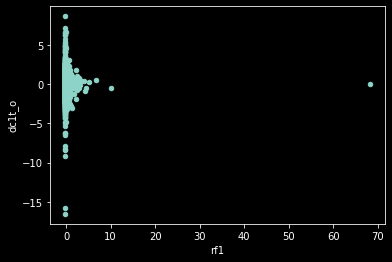

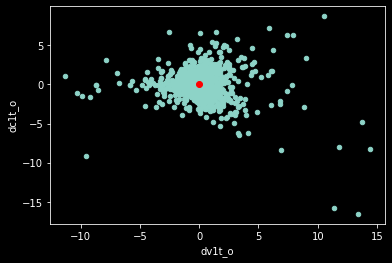

<AxesSubplot:xlabel='rf2', ylabel='dc1t_o'>

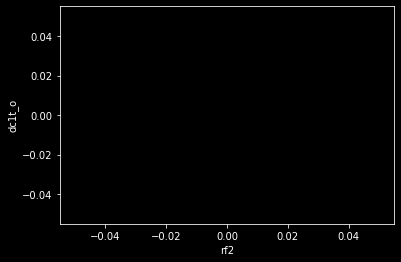

In [27]:
sign.plot.scatter('rf1','dc1t_o')

sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()

sign.plot.scatter('rf2','dc1t_o')

### Rf Study vs dv1t_o


- Resonance Factor 1
    - Reaches its max when price changes at or close to 0
    - For dv1t_o <0 rf1 is nonzero

- Resonance Factor 2
    - Reaches its max when price changes at or close to 0
    - For all other values of dv1t_o, at or close to 0

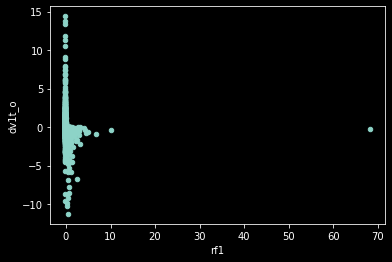

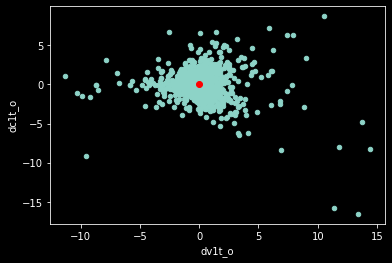

<AxesSubplot:xlabel='rf2', ylabel='dv1t_o'>

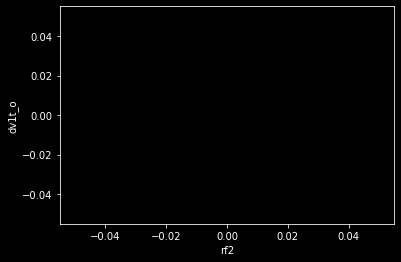

In [28]:
sign.plot.scatter('rf1','dv1t_o')

sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()

sign.plot.scatter('rf2','dv1t_o')

<Figure size 1440x1440 with 0 Axes>

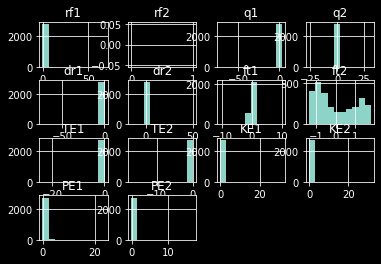

<Figure size 1440x1440 with 0 Axes>

In [29]:
sign[['rf1','rf2','q1','q2','dr1','dr2','ft1','ft2','TE1','TE2','KE1','KE2','PE1','PE2']][sign.idpos1==1].hist()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

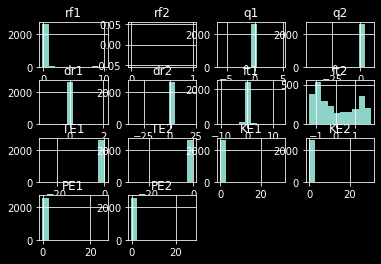

<Figure size 1440x1440 with 0 Axes>

In [30]:
sign[['rf1','rf2','q1','q2','dr1','dr2','ft1','ft2','TE1','TE2','KE1','KE2','PE1','PE2']][sign.idpos1==0].hist()
plt.figure(figsize=(20,20))

<AxesSubplot:>

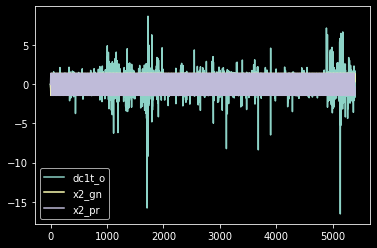

In [31]:
t = 1-(sign.x2_pr/sign.x2_gn)
sign[['dc1t_o','x2_gn','x2_pr']].plot()